In [2]:
import numpy as np

In [3]:
def P_max(f, x_max):                  # Part of solution
    if x_max<1:
        return 0
    x_maxplus_1 = np.array([x for x in f if x>x_max-1])
    x_maxplus_2 = np.array([x for x in x_maxplus_1 if x>x_max])
    P = (x_max**len(x_maxplus_2))/np.product(x_maxplus_2) - ((x_max-1)**len(x_maxplus_1))/np.product(x_maxplus_1)
    return P

In [3]:
print("%0.3f" %P_max([1, 2, 3, 4, 5], 1))

0.008


In [11]:
import itertools
import matplotlib.pyplot as plt
def simulate_P_max(m, m_max):
    ranges = []
    outcomes = []
    P_emp = []
    P_th = P_max(m, m_max)
    for i in range(0, len(m)):
        ranges.append(range(1, m[i]+1))
    answer = [list(v) for v in itertools.product(*ranges)]
    for i in range(0, 10000):
        outcomes.append(answer[np.random.randint(0, len(answer))])
        favourable_outcomes = [x for x in outcomes if max(x) == m_max]
        P_emp.append(len(favourable_outcomes)/len(outcomes))
    plt.plot(np.arange(1, 10001), P_emp)
    plt.plot(np.arange(1, 10001), [P_th]*10000, 'r')
    plt.gcf().set_size_inches(20,10)
    plt.gca().set_xlim([0, 10000])
    plt.gca().set_ylim([0, min(2*P_th,1)])
    plt.show()

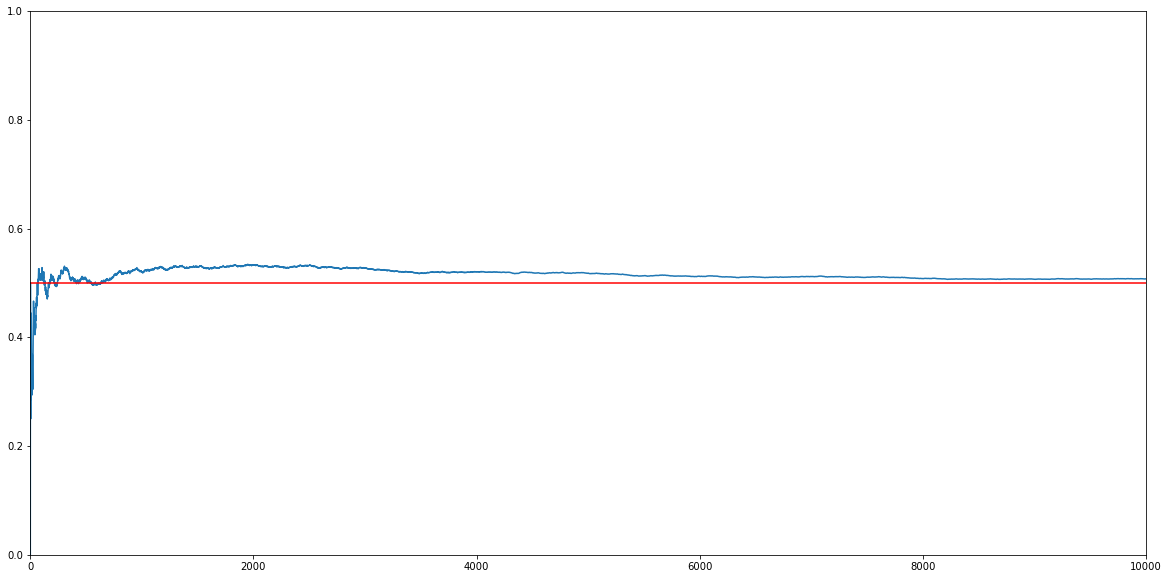

In [13]:
simulate_P_max([1, 2], 1)

In [4]:
P_max([2, 5, 7], 4)

0.20000000000000001

In [1]:
def constrained_composition(m, n):
    k = len(m)
    parts = set()
    if k == n:
        if 1 <= min(m):
            parts.add((1,)*n)
    if k == 1:
        if n <= m[0]:
            parts.add((n,))
    else:
        for x in range(1, min(n-k+2,m[0]+1)):
            for y in constrained_composition(m[1:],n-x):
                parts.add((x,)+y)
    return parts

In [2]:
def P_sum(m, s):                               # part of solution
    return len(constrained_composition(s, m))/np.product(m)